# Training CNN model to predict Mask and No Mask  (Images)



# Install Packages

In [1]:
pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8 MB 26 kB/s 
     |████████████████████████████████| 3.8 MB 44.4 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
     |████████████████████████████████| 448 kB 51.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7553 sha256=b8feac1f31714e7a528cc930cb7599bcc587f1897c6fb3b27db6ea5bdaab2429
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [ ]:
pip install keras==2.3.1

     |████████████████████████████████| 377 kB 6.9 MB/s 
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [2]:
pip install keras==2.3.1

     |████████████████████████████████| 377 kB 8.3 MB/s 
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


# Training model

In [3]:
#import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt





In [4]:
import os
os.getcwd()

'/content'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_data_path = "/content/drive/MyDrive/New Masks Dataset/Train"
validation_data_path = "/content/drive/MyDrive/New Masks Dataset/Validation"

In [7]:
# show augmented images
def plotImages(images_arr): #here plotInages() user defined function
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [8]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(200, 200), # all images will be resized to 150x150
                                      batch_size=128,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 600 images belonging to 2 classes.


In [9]:
training_data.class_indices

{'Mask': 0, 'Non Mask': 1}

In [10]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(200,200),
                                  batch_size=128,
                                  class_mode='binary')

Found 306 images belonging to 2 classes.


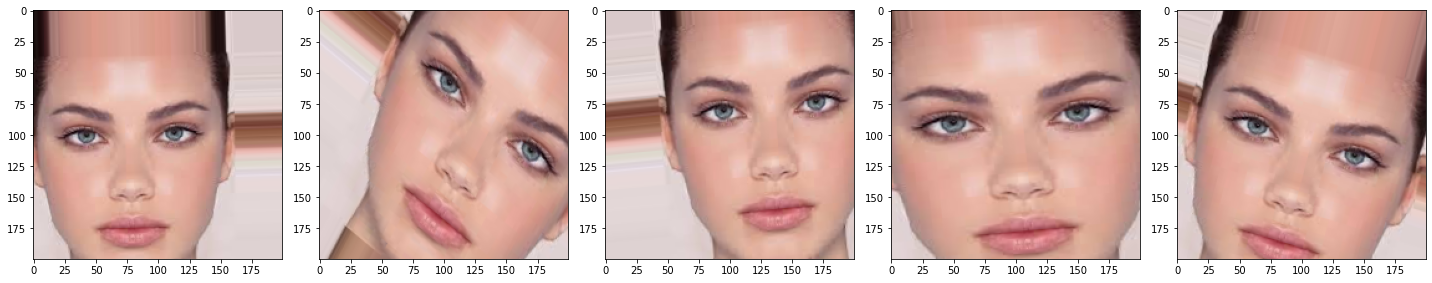

In [11]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [12]:
# save best model using valid accuracy
model_path = '/content/drive/MyDrive/model.h5' #model user defined folder and model.h5
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [13]:

#Building cnn model
cnn_model =keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
    keras.layers.MaxPooling2D(pool_size=(4,4)),
    keras.layers.Conv2D(filters=64, kernel_size=4),
        keras.layers.MaxPooling2D(pool_size=(3,3)),
        keras.layers.Conv2D(filters=128, kernel_size=3),
         keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
            keras.layers.Conv2D(filters=256, kernel_size=2),
            keras.layers.MaxPooling2D(pool_size=(2,2)),

            keras.layers.Dropout(0.5),                                                                        
                    keras.layers.Flatten(), # neural network beulding
                keras.layers.Dense(units=128, activation='relu'), # input layers
                        keras.layers.Dropout(0.1),                                    
                        keras.layers.Dense(units=256, activation='relu'),                                    
                         keras.layers.Dropout(0.25),                                    
                    keras.layers.Dense(units=2, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


NameError: ignored

In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 14.25

Epoch 1/50
15/29 [==============>...............] - ETA: 2:01 - loss: 0.6921 - accuracy: 0.5950

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - 286s 9s/step - loss: 0.6358 - accuracy: 0.6519 - val_loss: 0.2482 - val_accuracy: 0.9107

Epoch 00001: val_accuracy improved from -inf to 0.91067, saving model to model\model.h5
Epoch 2/50
29/29 [==============================] - 283s 10s/step - loss: 0.3142 - accuracy: 0.8892 - val_loss: 0.1958 - val_accuracy: 0.9355

Epoch 00002: val_accuracy improved from 0.91067 to 0.93548, saving model to model\model.h5
Epoch 3/50
29/29 [==============================] - 278s 9s/step - loss: 0.3373 - accuracy: 0.8798 - val_loss: 0.1671 - val_accuracy: 0.9442

Epoch 00003: val_accuracy improved from 0.93548 to 0.94417, saving model to model\model.h5
Epoch 4/50
29/29 [==============================] - 279s 9s/step - loss: 0.2854 - accuracy: 0.8914 - val_loss: 0.1917 - val_accuracy: 0.9280

Epoch 00004: val_accuracy did not improve from 0.94417
Epoch 5/50
29/29 [==============================] - 287s 10s/step - loss: 0.2606 - accuracy: 0.9079 - val_loss: 0.179


Epoch 00040: val_accuracy did not improve from 0.98387
Epoch 41/50
29/29 [==============================] - 134s 5s/step - loss: 0.1254 - accuracy: 0.9565 - val_loss: 0.0689 - val_accuracy: 0.9789

Epoch 00041: val_accuracy did not improve from 0.98387
Epoch 42/50
29/29 [==============================] - 136s 5s/step - loss: 0.1276 - accuracy: 0.9584 - val_loss: 0.0442 - val_accuracy: 0.9851

Epoch 00042: val_accuracy improved from 0.98387 to 0.98511, saving model to model\model.h5
Epoch 43/50
29/29 [==============================] - 121s 4s/step - loss: 0.1251 - accuracy: 0.9549 - val_loss: 0.0659 - val_accuracy: 0.9752

Epoch 00043: val_accuracy did not improve from 0.98511
Epoch 44/50
29/29 [==============================] - 117s 4s/step - loss: 0.1332 - accuracy: 0.9513 - val_loss: 0.0637 - val_accuracy: 0.9777

Epoch 00044: val_accuracy did not improve from 0.98511
Epoch 45/50
29/29 [==============================] - 117s 4s/step - loss: 0.1488 - accuracy: 0.9438 - val_loss: 0.05

In [ ]:
cnn_model.save('model/model_last.h5')


In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 14.25

Epoch 1/50
29/29 [==============================] - 104s 3s/step - loss: 0.1216 - accuracy: 0.9551 - val_loss: 0.0613 - val_accuracy: 0.9777

Epoch 00001: val_accuracy did not improve from 0.98511
Epoch 2/50
29/29 [==============================] - 103s 4s/step - loss: 0.1164 - accuracy: 0.9556 - val_loss: 0.0573 - val_accuracy: 0.9801

Epoch 00002: val_accuracy did not improve from 0.98511
Epoch 3/50
29/29 [==============================] - 104s 4s/step - loss: 0.1193 - accuracy: 0.9570 - val_loss: 0.0550 - val_accuracy: 0.9801

Epoch 00003: val_accuracy did not improve from 0.98511
Epoch 4/50
29/29 [==============================] - 106s 4s/step - loss: 0.1050 - accuracy: 0.9649 - val_loss: 0.0622 - val_accuracy: 0.9777

Epoch 00004: val_accuracy did not improve from 0.98511
Epoch 5/50
29/29 [==============================] - 103s 4s/step - loss: 0.1213 - accuracy: 0.9556 - val_loss: 0.0544 - val_accuracy: 0.9826

Epoch 00005: val_accuracy did not improve from 0.98511
Epoch 6/50
29/2

In [ ]:
cnn_model.save('model/model_last.h5')

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(cnn_model.history['loss'], label='train loss')
plt.plot(cnn_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(cnn_model.history['accuracy'], label='train acc')
plt.plot(cnn_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

TypeError: ignored